In [1]:
##Anomaly Detection

In [2]:
###Problem Statement: Develop an anomaly detection model to identify abnormal data points in a dataset containing two features.
#The dataset includes a mix of normal observations and outliers (anomalies) generated from different distributions.
#The goal is to accurately distinguish between normal data points and anomalies using the Isolation Forest algorithm.
#This model will help in detecting unusual patterns or data points that deviate significantly from the norm, which is crucial for various applications such as fraud detection, network security, and sensor monitoring.

In [3]:
#Import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
from sklearn.ensemble import IsolationForest

In [5]:
#Generate Data
np.random.seed(42)
n_samples= 1000
n_anomalies= 50


In [10]:
#for normal data
mean= [0,0]
cov= [[1,0],[0,1]]
data_normal= np.random.multivariate_normal(mean,cov,n_samples-n_anomalies)

In [9]:
#for anomaly data
anomaly_mean= [5,5]
anomaly_cov= [[1,0],[0,1]]
data_anomalies= np.random.multivariate_normal(anomaly_mean,anomaly_cov,n_anomalies)

In [13]:
#combine data
data_combined = np.vstack((data_normal, data_anomalies))

In [14]:
labels = np.hstack((np.zeros(n_samples), np.ones(n_anomalies)))

In [16]:
df = pd.DataFrame(data_combined, columns=['Feature_1', 'Feature_2'])

In [17]:
df.head()

,Feature_1,Feature_2
0,0.376410,-0.902052
1,-0.869663,1.125435
2,-1.189412,1.642673
3,-0.900621,0.638392
4,-0.328618,0.603187


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


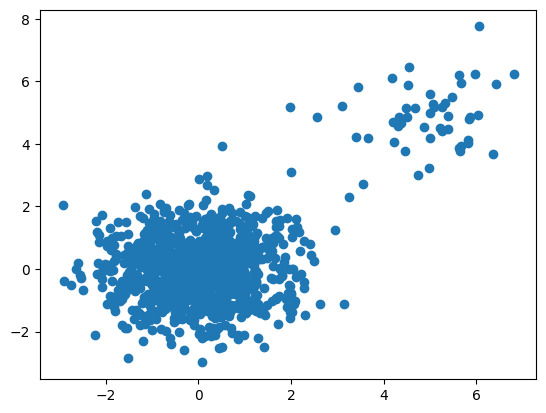

In [19]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

In [27]:
clf= IsolationForest(contamination=0.2)
clf.fit(df)
predictions= clf.predict(df)

In [28]:
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1

In [23]:
x= df.values

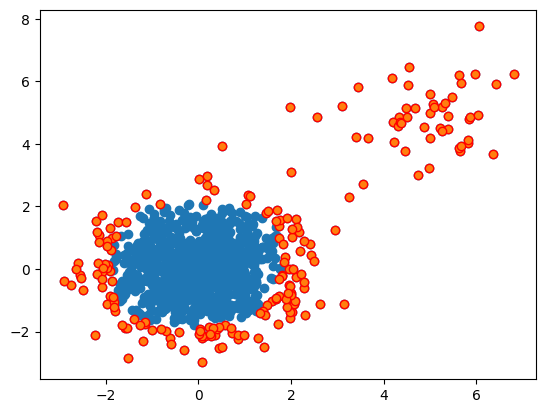

In [32]:
index= np.where(predictions < 0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0], x[index,1],edgecolors='r')